In [2]:
import urllib  
import requests
from bs4 import BeautifulSoup
import json
import os
#urllib、requests都是爬取数据的基本库，只是两者的爬取方式不同
#BeautifulSoup是解析网络文本的工具库

# urllib

In [5]:
#发送请求
response = urllib.request.urlopen('https://www.python.org')
#print(response.read().decode('utf-8'))
print(response.status)#状态码 200代表成功 404代表网页不存在 500代表服务器内部错误
print(response.getheaders())#相应头信息
print(response.getheader('Server'))


200
[('Server', 'nginx'), ('Content-Type', 'text/html; charset=utf-8'), ('X-Frame-Options', 'DENY'), ('Via', '1.1 vegur'), ('Via', '1.1 varnish'), ('Content-Length', '48845'), ('Accept-Ranges', 'bytes'), ('Date', 'Mon, 30 Sep 2019 08:43:03 GMT'), ('Via', '1.1 varnish'), ('Age', '1877'), ('Connection', 'close'), ('X-Served-By', 'cache-iad2124-IAD, cache-lax8630-LAX'), ('X-Cache', 'HIT, HIT'), ('X-Cache-Hits', '2, 276'), ('X-Timer', 'S1569832984.922612,VS0,VE0'), ('Vary', 'Cookie'), ('Strict-Transport-Security', 'max-age=63072000; includeSubDomains')]
nginx


In [11]:
#传递更多网址信息（此时请求方式为post）
data={'word':'hello'}
search=urllib.parse.urlencode(data)
a='https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'+search
response=urllib.request.urlopen(a)
print(response.read())


b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="zh-HK"><head><meta content="Google &#22294;&#29255; - &#32178;&#19978;&#26368;&#20840;&#38754;&#30340;&#22294;&#29255;&#25628;&#23563;&#26381;&#21209;&#12290;" name="description"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google &#22294;&#29255;</title><script nonce="qYAkheFjQYf3uJ+7yi3ckw==">(function(){window.google={kEI:\'0sCRXZMZ2uD4BqaApogG\',kEXPI:\'0,1353746,3656,2007,731,223,510,19,1046,1216,866,1069,378,207,1017,54,249,1087,671,2,124,10,713,320,18,48,491,670,126,1131274,1197715,329552,1294,12383,4855,32692,15247,867,12163,12923,3598,369,3314,5505,2442,5942,1119,2,578,728,2432,1361,4323,4968,773,2254,2816,1924,7,3111,6196,1719,1808,1478,7,491,10953,5297,897,1119,38,920,682,191,1217,2975,2729,7,3061,2,631,3240,8066,803,2081,20,318,1118,904,101,2024,1,370,2777,519,399,910,82,1285

In [14]:
#请求中加入headers等信息时，利用request
url = 'http://httpbin.org/post'
headers = {
    'User-Agent': 'Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)',
    'Host': 'httpbin.org'
}
dict = {
    'name': 'Germey'
}
data = bytes(urllib.parse.urlencode(dict), encoding='utf8')
#构造request对象
req = urllib.request.Request(url=url, data=data, headers=headers, method='POST')
response = urllib.request.urlopen(req)
print(response.read().decode('utf-8'))

{
  "args": {}, 
  "data": "", 
  "files": {}, 
  "form": {
    "name": "Germey"
  }, 
  "headers": {
    "Accept-Encoding": "identity", 
    "Content-Length": "11", 
    "Content-Type": "application/x-www-form-urlencoded", 
    "Host": "httpbin.org", 
    "User-Agent": "Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)"
  }, 
  "json": null, 
  "origin": "115.156.142.115, 115.156.142.115", 
  "url": "https://httpbin.org/post"
}



In [26]:
#链接解析
#url的识别与分段
#将链接拆成6部分，://前面的就是scheme，代表协议；第一个/前面便是netloc，即域名；分号;前面是params，代表参数
result = urllib.parse.urlparse('http://www.baidu.com/index.html;user?id=5#comment')
print(result)

#url合成，此时输入的参数必须是6个
data = ('http', 'www.baidu.com', 'index.html', 'user', 'a=6', 'comment')
print(urllib.parse.urlunparse(data))

#url拼接
#base_url(baidu)提供了三项内容scheme、netloc和path。如果这3项在新的链接(cuiqingcai)里不存在，就予以补充；如果新的链接存在，就使用新的链接的部分。而base_url中的params、query和fragment是不起作用的。
print(urllib.parse.urljoin('http://www.baidu.com', 'https://cuiqingcai.com/FAQ.html'))

#反序列
query = 'name=germey&age=22'
print(urllib.parse.parse_qs(query))#转回字典
print(urllib.parse.parse_qsl(query))#转成元组组成的列表

#将内容转为URL编码的格式（例如带有中文时）
keyword = '壁纸'
url = 'https://www.baidu.com/s?wd=' + urllib.parse.quote(keyword)
print(url)

ParseResult(scheme='http', netloc='www.baidu.com', path='/index.html', params='user', query='id=5', fragment='comment')
http://www.baidu.com/index.html;user?a=6#comment
https://cuiqingcai.com/FAQ.html
{'name': ['germey'], 'age': ['22']}
[('name', 'germey'), ('age', '22')]
https://www.baidu.com/s?wd=%E5%A3%81%E7%BA%B8


In [28]:
#解析robot协议，即网站中的文件指出哪些网页可被抓取，哪些不行
from urllib.robotparser import RobotFileParser

rp = RobotFileParser()#创建一个实例
rp.set_url('http://www.jianshu.com/robots.txt')
rp.read()
print(rp.can_fetch('*', 'http://www.jianshu.com/p/b67554025d7d'))
#print(rp.can_fetch('*', "http://www.jianshu.com/search?q=python&page=1&type=collections")

False


# request

In [4]:
#利用不同的方式得到网页
r = requests.get('https://www.baidu.com/')
r = requests.post('http://httpbin.org/post')
r = requests.put('http://httpbin.org/put')
r = requests.delete('http://httpbin.org/delete')
r = requests.head('http://httpbin.org/get')
r = requests.options('http://httpbin.org/get')

In [6]:
#添加数据
data = {
    'name': 'germey',
    'age': 22
}
r = requests.get("http://httpbin.org/get", params=data)
print(r.text)
print(r.json())#将json类型的字符串转换成字典

{
  "args": {
    "age": "22", 
    "name": "germey"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.22.0"
  }, 
  "origin": "115.156.141.102, 115.156.141.102", 
  "url": "https://httpbin.org/get?name=germey&age=22"
}

{'args': {'age': '22', 'name': 'germey'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.22.0'}, 'origin': '115.156.141.102, 115.156.141.102', 'url': 'https://httpbin.org/get?name=germey&age=22'}


In [10]:
#抓取二进制数据（以GitHub的站点图标为例）
r = requests.get("https://github.com/favicon.ico")
print(r.content)
#存储图片
with open('testt/favicon.ico', 'wb') as f:
    f.write(r.content)

b'\x00\x00\x01\x00\x02\x00\x10\x10\x00\x00\x01\x00 \x00(\x05\x00\x00&\x00\x00\x00  \x00\x00\x01\x00 \x00(\x14\x00\x00N\x05\x00\x00(\x00\x00\x00\x10\x00\x00\x00 \x00\x00\x00\x01\x00 \x00\x00\x00\x00\x00\x00\x05\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11\x11\x13v\x13\x13\x13\xc5\x0e\x0e\x0e\x12\x00\x00\x00\x00\x00\x00\x00\x00\x0f\x0f\x0f\x11\x11\x11\x14\xb1\x13\x13\x13i\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\x14\x14\x96\x13\x13\x14\xfc\x13\x13\x14\xed\x00\x00\x00\x19\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x15\x15\x17\xff\x15\x15\x17\xff\x11\x11\x13\x85\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x11\x11\x12\xc1\x13\x13\x14\xee\x11\x11\x11\x1e\x10\x10\x10\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\r\x13\x13\x14\xf5\x15\x15\x17\xff\x15\x15\x17\xff\x11\x1

In [11]:
#文件上传
#requests可以模拟提交一些数据。假如有的网站需要上传文件，我们也可以用它来实现
files = {'file': open('testt/favicon.ico', 'rb')}
r = requests.post("http://httpbin.org/post", files=files)
print(r.text)

#身份认证
#某些网站需要身份认证才能登陆
r = requests.get('http://localhost:5000', auth=('username', 'password'))
print(r.status_code)

{
  "args": {}, 
  "data": "", 
  "files": {
    "file": "data:application/octet-stream;base64,AAABAAIAEBAAAAEAIAAoBQAAJgAAACAgAAABACAAKBQAAE4FAAAoAAAAEAAAACAAAAABACAAAAAAAAAFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABERE3YTExPFDg4OEgAAAAAAAAAADw8PERERFLETExNpAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABQUFJYTExT8ExMU7QAAABkAAAAAAAAAAAAAABgVFRf/FRUX/xERE4UAAAAAAAAAAAAAAAAAAAAAAAAAABEREsETExTuERERHhAQEBAAAAAAAAAAAAAAAAAAAAANExMU9RUVF/8VFRf/EREUrwAAAAAAAAAAAAAAABQUFJkVFRf/BgYRLA4ODlwPDw/BDw8PIgAAAAAAAAAADw8PNBAQEP8VFRf/FRUX/xUVF/8UFBSPAAAAABAQEDAPDQ//AAAA+QEBAe0CAgL/AgIC9g4ODjgAAAAAAAAAAAgICEACAgLrFRUX/xUVF/8VFRf/FRUX/xERES0UFBWcFBQV/wEBAfwPDxH7DQ0ROwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0NEjoTExTnFRUX/xUVF/8SEhKaExMT2RUVF/8VFRf/ExMTTwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAERERTBUVF/8VFRf/ExMT2hMTFPYVFRf/FBQU8AAAAAIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAITExTxFRUX/xMTFPYTExT3FRUX/xQUFOEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFBQU4RUVF/8TExT3FBQU3hUVF/8TExT5Dw8PIQAAAAAAAAAAA

# 输入需要搜索的东西 自动请求网页信息 返回网页源码

输入您需要查找的图片主题
猪
<!DOCTYPE doctype html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="zh-HK">
 <head>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <meta content="origin" name="referrer"/>
  <title>
   猪 - Google 搜尋
  </title>
  <script nonce="8Js2rkLRqZu5X5SZ5YoxcA==">
   (function(){window.google={kEI:'hcWRXcW0FtKPr7wP-9ibSA',kEXPI:'0,1353746,5663,730,224,510,19,226,820,1217,1934,378,207,1017,53,2008,2,124,10,169,544,320,18,48,491,670,128,92,1131180,1197728,329539,1294,7105,180,3382,1716,1604,2044,314,893,633,1770,1137,4795,1334,3650,314,744,1744,260,68,5033,10931,279,1191,14056,867,7049,2445,2646,23,770,845,3666,1027,6615,3598,363,3320,5505,2442,1519,1800,512,2111,1119,2,579,727,2431,1362,4323,4968,773,2256,4738,6,3115,6193,1719,1808,1478,7,491,10953,5297,897,1119,38,920,873,1217,2559,416,2729,7,2655,315,91,2,631,3240,694,448,12,359,2,505,12,5,7,6022,2884,20,318,1118,904,101,2024,1,371,2775,520,399,992,50
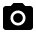
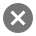
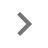
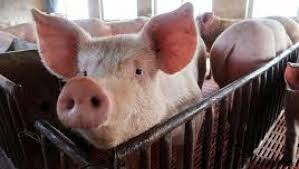
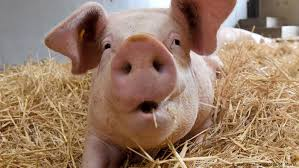
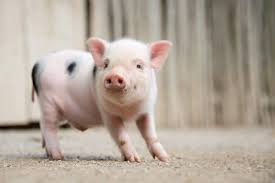
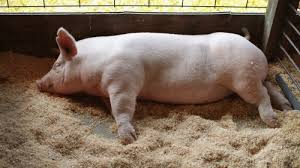
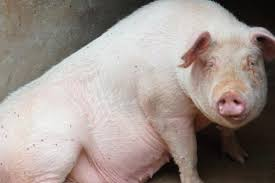
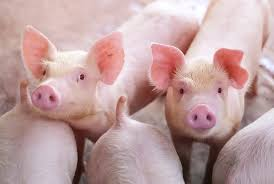
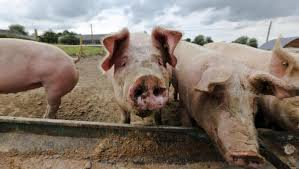
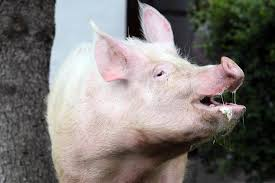
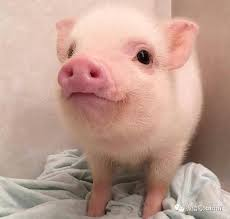

In [25]:
#定义网站的名字 可以自定义任何一个网站 这里用的是谷歌图片
GOOGLE_IMAGE = \
    'https://www.google.com/search?site=&tbm=isch&source=hp&biw=1873&bih=990&'
#获取输入的数据
print('输入您需要查找的图片主题')
data=input()
#将data转换成字典
data={'q':data}
#将输入数据变成网页格式 此函数仅编码两元素元组或字典
search=urllib.parse.urlencode(data)
#拼接得到最终的网址
search=GOOGLE_IMAGE+search

#请求之前先伪装成浏览器，需要定义头部信息
usr_agent = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
    'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
    'Accept-Encoding': 'none',
    'Accept-Language': 'en-US,en;q=0.8',
    'Connection': 'keep-alive',
    }
#利用头部信息，生成一个请求
Req=urllib.request.Request(search,headers=usr_agent)
#提交请求
response = urllib.request.urlopen(Req)
#获取源代码
html=response.read()

#将源代码按html格式输出
soup = BeautifulSoup(html, 'html.parser') #'html.parser'代表的是采用的解析器
print(soup.prettify())

In [5]:
#查找html源码中div标签中的内容
results=soup.findAll('div',{"class":'rg_meta'})
results

[<div class="rg_meta notranslate">{"cb":9,"cl":3,"cr":15,"id":"DfYREnTVY8oK-M:","isu":"agric.wa.gov.au","itg":0,"ity":"jpg","oh":1357,"ou":"https://www.agric.wa.gov.au/sites/gateway/files/P15_7479%20Pig%20in%20straw%20shelter_1.jpg","ow":2040,"pt":"Keep pigs healthy - follow the biosecurity checklist ...","rh":"agric.wa.gov.au","rid":"p0LhePXzIQOTyM","rmt":0,"rt":0,"ru":"https://www.agric.wa.gov.au/livestock-biosecurity/keep-pigs-healthy-follow-biosecurity-checklist","st":"Department of Agriculture and Food, Western Australia","th":183,"tu":"https://encrypted-tbn0.gstatic.com/images?q\u003dtbn:ANd9GcSFUuRQJCn0HhnPQmaaaY_guaVgiyA7NcwHN3g9MGIY-7pVVau2","tw":275}</div>,
 <div class="rg_meta notranslate">{"cl":3,"cr":3,"id":"Vx4VjrqsUX-oQM:","isu":"nbcnews.com","itg":0,"ity":"jpg","oh":507,"ou":"https://media3.s-nbcnews.com/j/newscms/2018_33/2396836/ss-180412-twip-07_fb2bf30232dbcd77d3cb9780eaf07eb7.fit-760w.jpg","ow":760,"pt":"Lab-grown lungs successfully transplanted into pigs, raising .

In [8]:
results[0]
#将json对象转化成python对象,得到其中的链接信息
link=json.loads(results[0].text)['ou']
#发送链接请求
rs=requests.get(link)
#将链接内容存入新的文件中
with open('img0','w') as f:
    f.write(str(rs.content))

'/Users/xwx/Desktop/learning'